5. 신경망 


- 신경망이라 알려진 알고리즘들은 최근 '딥러닝'이란 이름으로 주목 받고 있다.
- 복잡한 딥러닝 알고리즘의 출발점이며 비교적 간단하게 분류와 회귀에 이용 가능한 다층 퍼셉트론(Multilayer Perceptrons, MLP)를 다룬다.
- MLP는 피드-포워드(Feed-Forward) 신경망, 또는 그냥 신경망이라고도 한다. 


1) MLP는 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이라고 볼 수 있다.
   - 선형 회귀 모델의 예측공식
       y = w[0]*x[0]+......w[p]*x[p]+b
       y는 x[0] ~ [p]까지의 입력 특성과 w[0] ~ [p]까지 학습된 계수의 가중치 합이다. 

In [6]:
import mglearn
import graphviz
import numpy as np
import matplotlib.pyplot as plt

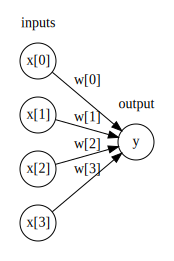

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

- 왼쪽의 노드는 입력 특성을 나타내며 연결 선은 학습된 계수 표현, 오른쪽 노드는 입력의 가중치 합, 즉 출력
- MLP에서는 가중치 합을 만드는 과정이 여러번 반복되며, 중간 단계를 구성하는 은닉유닛을 계산하고 
  이를 이용하여 최종 결과 산출을 위해 다시 가중치 합을 계산한다.

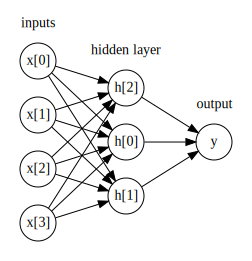

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- 이런 모델은 많은 계수(or 가중치)를 학습해야한다. 
- 계수는 각 입력과 은닉층, 은닉 유닛 사이, 은닉 유닛과 출력 사이마다 존재.
- 여러 개의 가중치 합을 계산하는 것은 수학적으로 보면 하나의 가중치 합을 계산하는 것과 같다. 
- 이 모델을 선형모델과 강력하게 만들기 위해 은닉 유닛의 가중치 합을 계산한 후, 그 결과에 비선형 함수(활성화 함수)인
  렐루, 하이퍼볼릭 탄젠트 적용 
  
  (렐루는 0이하를 잘라버리고, tanh 함수는 낮은 입력값에 대해서는 -1로 수렴하고 큰 입력값에는 +1로 수렴)

Text(0, 0.5, 'relu(x),tanh(x)')

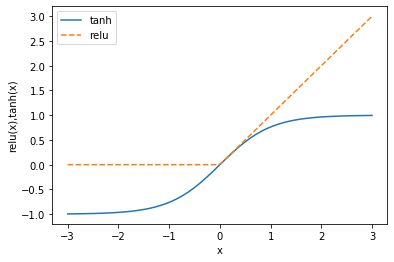

In [7]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label ="relu")
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x),tanh(x)')

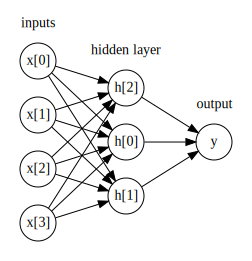

In [8]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- 위의 신경망으로 회귀 분석을 하기 위한공식 

  h[0]  =  tanh(w[0,0]x[0] +.... w[p,0]x[p]+b[0]
  
  h[1]  =  tanh(w[0,1]x[0] +.... w[p,1]x[p]+b[1]
  
  y = v[0]*h[0] ..... +v[p]*h[p] +b
  
- w는 x와 은닉층 h 사이의 가중치이고, v는 은닉층 h와 출력 y 사이의 가중치이다. 
- v와 w는 훈련데이터에서 학습하고, x는 입력특성, y는 계산된 출력, h는 중간 계산값이다. 

 (우리가 정해야 하는 중요 매개변수는 은닉층의 유닛 개수이지만 데이터 셋의 크기에 따라 달라진다. )
 
- 보통 분류의 경우 마지막 출력층에 시그모이드(이진분류)나 소프트맥스(다중 분류) 함수를 적용하여 최종 출력을 계산한다. 

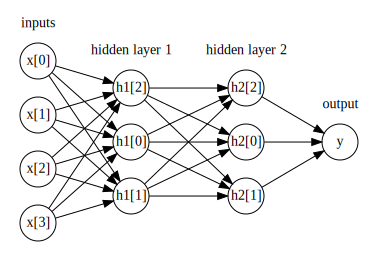

In [9]:
mglearn.plots.plot_two_hidden_layer_graph()

- 이와 같이 은닉층을 추가 가능하며, 많은 은닉층으로 구성된 대규모의 신경망이 생기며 이를 딥러닝이라고 부르게 된다. 

1)신경망 튜닝 

- 앞의 two_moons 데이터셋에 분류를위한 MLB 구현 적용

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'F 1')

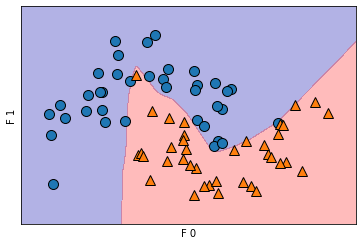

In [12]:
# 은닉 유닛이 100개(기본값)인 신경망으로 학습시킨 결정 경계
# 데이터 셋이 작아 은닉 유닛을 줄여도 좋은값 획득가능
X, y = make_moons(n_samples=100, noise=0.25, random_state = 3)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

mlp=MLPClassifier(solver = 'lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel('F 0')
plt.ylabel('F 1')

Text(0, 0.5, 'F 1')

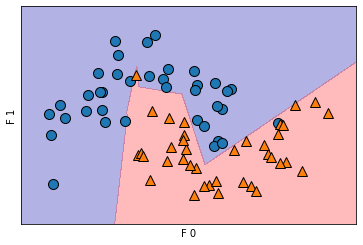

In [13]:
#은닉 유닛 10개로 줄인 결정경계
mlp=MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel('F 0')
plt.ylabel('F 1')

#은닉 유닛이 적어져 결정경계가 더욱 날카로워짐.
#매끄럽게 하려면 은닉 유닛을 추가, 은닉층을 추가, 또는 기본함수인 relu대신 tanh함수를 사용할 수 있다. 

Text(0, 0.5, 'F 1')

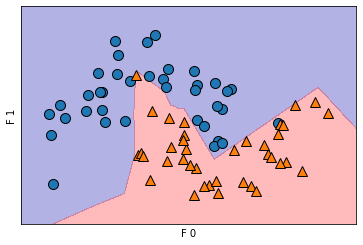

In [14]:
#10개의 은닉 유닛을 보유한 은닉층 2개 
mlp=MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel('F 0')
plt.ylabel('F 1')

Text(0, 0.5, 'F 1')

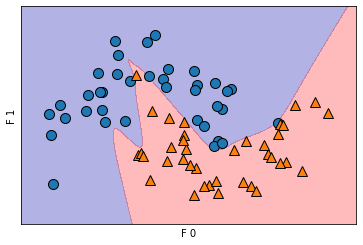

In [15]:
#10개의 은닉 유닛을 보유한 은닉층 2개, tanh함수 이용
mlp=MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=[10,10], activation='tanh').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel('F 0')
plt.ylabel('F 1')

- 이 외에도 릿지 회귀와, 선형 분류기에서 이용한 것처럼 L2규제를 이용해 가중치를 0에 가깝게 감소시켜

  모델의 복잡도를 제어 할 수 있다. 
- MLPCF에서 이런 역할을 매개변수는 alpha이며 기본값은 매우 낮다( 거의 규제 X)

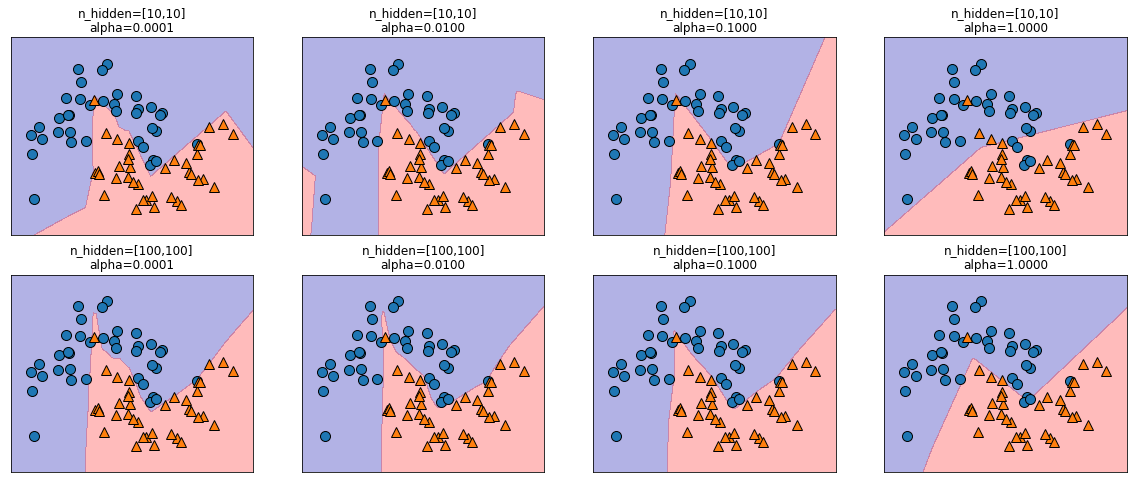

In [16]:
#데이터셋에 유닛이 각각 10개, 100개와 은닉층 2개를 이용헀을때 alpha값에 따른 영향 
fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes], alpha=alpha).fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{},{}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

- 이와 같이 신경망의 복잡도를 제어하는 방법에는 

  은닉층의 수, 유닛 개수, 규제를 이용할 수 있고, 드롭 아웃이 존재한다.

  ( 드롭아웃이란, 은닉층 유닛의 일부를 랜덤하게 작동시키지 않음으로 다른 신경망을 앙상블 시키는 효과를 내어 과대적합 방지 가능)
  
- 신경망에서는 학습 시작전 가중치를 무작위로 설정하여, 이 무작위한 초기화가 모델의 학습에 영향을 준다. 

  ( 따라서 같은 매개변ㄴ수 이용하더라도, 초깃값이 다르면 모델이 달라질 수 있다. )

In [21]:
#MLPCF를 유방암 데이터셋에 적용 ( 매개변수 기본값 )
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('훈련셋 정확도 :{:.3f}'.format(mlp.score(X_train,y_train)))
print('테스트셋 정확도 :{:.3f}'.format(mlp.score(X_test, y_test)))

#이전의 SVC예제보다 낮은 성능이다. 
#SVC와 마찬가지로 신경망도 모든 입력 틍성을 평균은 0, 분산은 1이 되도록 변형하는 것이 좋다. 

훈련셋 정확도 :0.939
테스트셋 정확도 :0.916


In [22]:
#데이터 스케일을 맞춰서 진행 

#평균과 표준편차
mean_on_train = X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)

#평균을 빼고 표준편차로 나누면 평균 0, 표준편차 1인 데이터로 변환
X_train_scaled = (X_train -mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)

print('훈련셋 정확도 :{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트셋 정확도 :{:.3f}'.format(mlp.score(X_test_scaled, y_test)))

# 성능이 매우 향상 되었으며, 경고는 최대 반복 횟수에 도달한것을 알리는 것으로 반복횟수를 늘려야 한다. 
# adam 알고리즘은 경사하강법의 학습률 매개변수를 학습이 반복됨에 따라 조정해가는 알고리즘. 
# 기본값은 200이며 성능향상이 되지 않을 경우 no_iter_no_change 매개변수 이용가능 ( 검증 데이터 비율은 validation_fraction에서 지정하며 기본값은 0.1)

훈련셋 정확도 :0.993
테스트셋 정확도 :0.965


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
#max_iter로 반복횟수 늘림

mlp=MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print('훈련셋 정확도 :{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트셋 정확도 :{:.3f}'.format(mlp.score(X_test_scaled, y_test)))


훈련셋 정확도 :1.000
테스트셋 정확도 :0.965


In [24]:
#일반화 성능을 높이기 위해 복잡도를 낮춤 ( 가중치를 강하게 규제 ) alpha 기본값을 0.0001에서 1로

mlp=MLPClassifier(random_state=42, max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)

print('훈련셋 정확도 :{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트셋 정확도 :{:.3f}'.format(mlp.score(X_test_scaled, y_test)))


훈련셋 정확도 :0.986
테스트셋 정확도 :0.979


- 신경망의 학습과정 분석은 선형모델이나 트리모델보다는 까다롭다. 
- 모델의 가중치를 확인하여 무엇이 학습되었는지 확인 가능하다. 

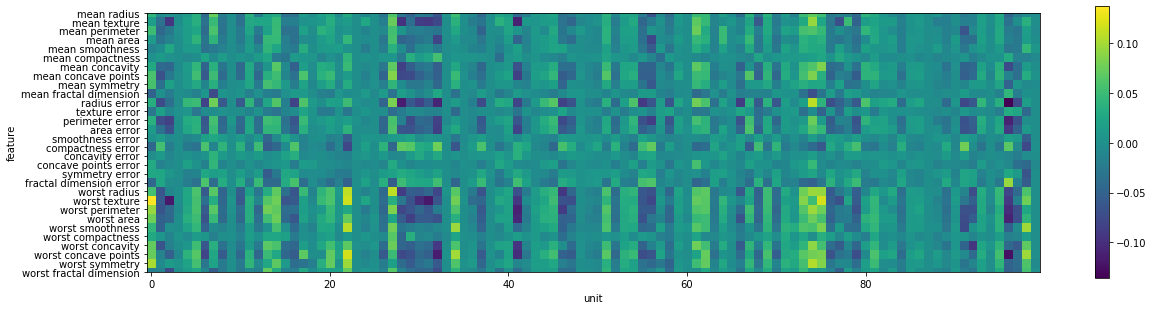

In [29]:
# cancer 데이터의 가중치
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation = 'none',cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('unit')
plt.ylabel('feature')
plt.colorbar()

- MLP는 일반적인 신경망 구조를 위한 쉬운 인터페이스를 제공하지만, 전체 신경망 종류 중 일부만 만들 수 있다
- 더 복잡하고 대규모인 모델을 위해 keras, lasgna, tensorflow등이 널리 이용되고 있다. 
- 신경망은 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다. -> 머신러닝 알고리즘을 뛰어넘는 성능
- 학습시간이 오래걸리며, 데이터 전처리에 주의해야 한다. 또한 매개변수 튜닝은 매우 어려우며 위의 예제는 일부만 다룬 것이다. 

신경망에서 가장 중요한 매개변수는 은닉층의 개수와 은닉층의 각 유닛 수이다. 

신경망의 매개변수를 조정하는 일반적인 방법은 충분히 과대적합되어 문제를 해결할 만한 큰 모델 생성 후
훈련데이터가 충분히 학습될 수 있다고 생각될 때 신경망 구조를 줄이거나 규제를 강화하여 일반화 성능을 향상시킨다

solver 매개변수를 이용해 adam(기본값이며, 데이터 스케일에 민감), lbfgs(안정적이지만 대규모에는 속도저하)
sgd가 존재한다. 